<a href="https://colab.research.google.com/github/mrinal1404/breast-cancer-classification/blob/main/breast_cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv("breastcancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
df['diagnosis']=df['diagnosis'].map({'M':0,'B':1})

In [ ]:
x=df.drop(columns='diagnosis',axis=1)
y=df['diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(569, 31) (455, 31) (114, 31)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(x_train)

X_test_std = scaler.transform(x_test)
X_train_std = scaler.fit_transform(x_train)

X_test_std = scaler.transform(x_test)

In [ ]:
# importing tensorflow and Keras
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [ ]:
# setting up the layers of Neural Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(31, )),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
print([X_train_std.shape,y_train,y_test])

[(455, 31), 560    1
428    1
198    0
203    0
41     0
      ..
299    1
534    1
493    1
527    1
168    0
Name: diagnosis, Length: 455, dtype: int64, 528    1
291    1
467    1
108    0
340    1
      ..
471    1
449    0
24     0
38     0
230    0
Name: diagnosis, Length: 114, dtype: int64]


In [ ]:
# training the Meural Network

history = model.fit(X_train_std, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 20ms/step - loss: 0.4540 - accuracy: 0.8313 - val_loss: 0.3684 - val_accuracy: 0.8913
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 0.3042 - accuracy: 0.9267 - val_loss: 0.2593 - val_accuracy: 0.9130
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2274 - accuracy: 0.9413 - val_loss: 0.2028 - val_accuracy: 0.9565
Epoch 4/10
13/13 [==============================] - 0s 6ms/step - loss: 0.1873 - accuracy: 0.9413 - val_loss: 0.1706 - val_accuracy: 0.9783
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1613 - accuracy: 0.9438 - val_loss: 0.1501 - val_accuracy: 0.9783
Epoch 6/10
13/13 [==============================] - 0s 7ms/step - loss: 0.1443 - accuracy: 0.9560 - val_loss: 0.1356 - val_accuracy: 0.9783
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1302 - accuracy: 0.9584 - val_loss: 0.1234 - val_accuracy: 0.9783
Epoch 8/10
13/13 [=

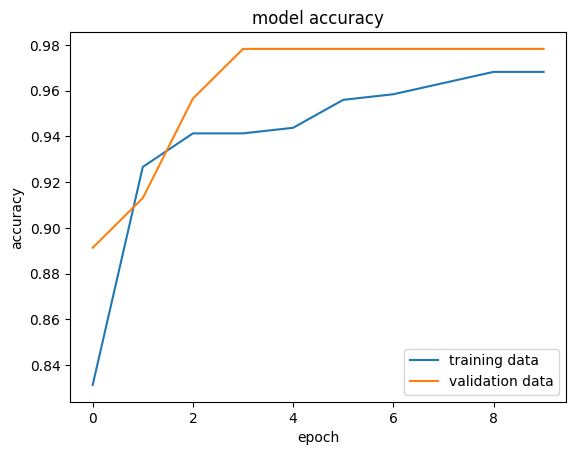

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

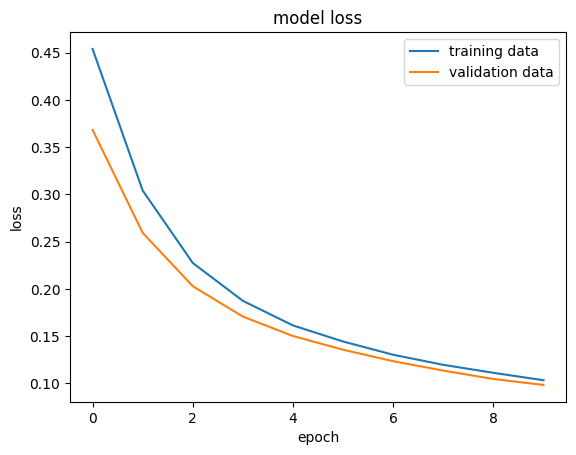

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [ ]:
loss, accuracy = model.evaluate(X_test_std, y_test)
print(accuracy)

4/4 [==============================] - 0s 6ms/step - loss: 0.1115 - accuracy: 0.9649
0.9649122953414917


In [ ]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 31)
[-0.23949961 -0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457
 -0.11323672  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124
  2.62763999  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593
  2.88971815 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552
 -0.38767294  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515
 -0.6268286 ]


In [ ]:
Y_pred = model.predict(X_test_std)

4/4 [==============================] - 0s 5ms/step


In [ ]:
print(Y_pred.shape)
print(Y_pred[0])

(114, 2)
[0.6035816 0.7542069]


In [ ]:
print(X_test_std)

[[-0.23949961 -0.04462793 -1.41612656 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [-0.2467237   0.24583601 -0.06219797 ...  0.54129749  0.11047691
   0.0483572 ]
 [-0.17438876 -1.26115925 -0.29051645 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [-0.24002111  0.72709489  0.45836817 ...  1.46701686  1.19909344
   0.65319961]
 [-0.2400006   0.25437907  1.33054477 ... -1.29043534 -2.22561725
  -1.59557344]
 [-0.23978737  0.84100232 -0.06676434 ...  2.15137705  0.35629355
   0.37459546]]


In [ ]:
print(Y_pred)

[[0.6035816  0.7542069 ]
 [0.46241876 0.6208771 ]
 [0.13663886 0.9692618 ]
 [0.99998933 0.01337322]
 [0.55764675 0.56528014]
 [0.99743074 0.17712283]
 [0.33759546 0.6578133 ]
 [0.18506457 0.9699935 ]
 [0.1485771  0.9015133 ]
 [0.17479733 0.9335531 ]
 [0.6903002  0.7288214 ]
 [0.29738757 0.9024814 ]
 [0.5610174  0.9130114 ]
 [0.31496605 0.82358825]
 [0.12347667 0.9062728 ]
 [0.8961692  0.34613138]
 [0.19946733 0.9635411 ]
 [0.09895555 0.90012366]
 [0.12214646 0.94785476]
 [0.9962954  0.21095644]
 [0.01823181 0.69253236]
 [0.19980589 0.964983  ]
 [0.36519504 0.9729358 ]
 [0.11264096 0.9656338 ]
 [0.21859561 0.75668305]
 [0.98099065 0.27592048]
 [0.37896293 0.8774838 ]
 [0.53562415 0.79293746]
 [0.9407961  0.24707891]
 [0.96153826 0.2762991 ]
 [0.28717527 0.89178634]
 [0.17225333 0.8498375 ]
 [0.12488234 0.9049097 ]
 [0.9996844  0.10060956]
 [0.99123746 0.05148358]
 [0.2836779  0.8416106 ]
 [0.44580087 0.994055  ]
 [0.36952522 0.83799106]
 [0.2085173  0.9720428 ]
 [0.11654583 0.8724779 ]


In [ ]:
  #argmax function

my_list = [0.25, 0.56]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.25, 0.56]
1


In [ ]:
# converting the prediction probability to class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


In [ ]:
input_data = (11,11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 [==============================] - 0s 34ms/step
[[0.35344034 0.9650463 ]]
[1]
The tumor is Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
